# W+c analysis

In this notebook, we will initiate a first diffractive analysis of W+c production using CMS data recorded in November 2017. We will adapt the strategy from [CMS-PAS-SMP-21-005](http://cms-results.web.cern.ch/cms-results/public-results/preliminary-results/SMP-21-005/index.html) and apply it to the diffractive production of W+c events. 

Production of W+c depends on the strange quark content of the proton. The leading diagrams of inclusive production of W + charm quark are:

<img src="http://cms-results.web.cern.ch/cms-results/public-results/preliminary-results/SMP-21-005/CMS-PAS-SMP-21-005_Figure_001.png" alt="Leading order diagrams for the associated production of a W boson and a charm quark. " width="1000" height="600" />

Analysis strategy uses the fact that the electric charges of the W boson and the c quark have opposite signs. In contrast, backgrounds have the same fraction of symmetric and asymmetric events. By subtracting Charge Symmetric from Charge Asymmetric processes, one can obtain a clean sample of W+c events as shown here:

<img src="http://cms-results.web.cern.ch/cms-results/public-results/preliminary-results/SMP-21-005/CMS-PAS-SMP-21-005_Figure_002-b.png" alt="Distributions after OS-SS subtraction of the pT of the lepton from the W decay."  width="500" height="600" />


In the analysis we want to measure diffractive fraction of W+c events, we have simulated diffractive and non-diffractive production of W+jets
If needed, install the package using:
```
!python -m pip install uproot4
```


In [1]:
#import uproot
import uproot4
import numpy as np
import matplotlib.pyplot as plt
import awkward
import mplhep as hep

Load the ROOT files with the simulated W+jets events

In [2]:
# relace next line with the path to your file (files that start with SD are diffractive events)
#path='data'
path='/eos/cms/store/user/mpitt/CERNSummerStudentProject2022'
signal_filename=path+'/SD_Wjet_pt20GeV.root' # '/SD_Wquark_pt20GeV.root'
background_filename=path+'/ND_Wjet_pt20GeV.root' # '/ND_Wquark_pt20GeV.root'

In [3]:
# read the file content
signal_tree_ = uproot4.open( signal_filename )["LHEF"]
background_tree_ = uproot4.open( background_filename )["LHEF"]

In [4]:
#select only stable and beam particles (to reduce the size)
signal_events = signal_tree_.arrays(['Particle.Pz','Particle.PT','Particle.Eta','Particle.Phi','Particle.PID','Particle.Status'],  cut="Particle.Status<2")
background_events = background_tree_.arrays(['Particle.Pz','Particle.PT','Particle.Eta','Particle.Phi','Particle.PID','Particle.Status'],  cut="Particle.Status<2")

### Event yields

The number of expected events is computed using the following formula:
$$ N = L \times \sigma $$ 

Where $L$ is the integrated luminosity, and $\sigma$ is the production cross-section. The following production cross-section corresponds to the simulated samples (jet = quark or gluon):
   * Diffractive W+quark: $\sigma = 0.1914 $ pb, W+jet: $\sigma = 0.252 $ pb
   * Non-diffractive W+quark: $\sigma = 25.88 $ pb, W+jet: $\sigma = 34.45 $ pb
   
As one can see, the diffractive component comprises 0.74% of the inclusive cross-section.

Taking the full Run 2 luminosity (138 fb$^{-1}$) we expect to obtain ~3.5M W+jet events.

Since we are interested in studying W+c events, we need to extract the fraction from the simulated samples. Particle type is stored as integers that correspond to a different type of particles and follows the MonteCarlo Particle DataGroup ID numbering scheme (https://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf)

In the first task, let us plot the different quark flavor in W+jets events for background and signal (check the [Wcharm_uproot_example.ipynb](Wcharm_uproot_example.ipynb) notebook for further information on how correctly to obtain the event content):

In [5]:
#verctor of PID values for signal events

#initialize the vector with zeros
sig_quark_id = np.zeros(len(signal_events))
sig_lep_id = np.zeros(len(signal_events))

#loop over all events and store the quark PID (the outgoing quark is the fourth particle in the list)
for i, ev in enumerate(signal_events):
    pid = ev['Particle.PID']
    #in signal sample pid is a vector of [proton, two incoming partons, outgoung parton, 2 W dauthers]
    sig_quark_id[i]=abs(pid[3]) if pid[3]!=21 else 0
    sig_lep_id[i]=pid[4]

In [6]:
#verctor of PID values for background events

#initialize the vector with zeros
bkg_quark_id = np.zeros(len(background_events))
bkg_lep_id = np.zeros(len(background_events))

#loop over all events and store the quark PID (the outgoing quark is the third particle in the list)
for i, ev in enumerate(background_events):
    pid = ev['Particle.PID']
    #in signal sample pid is a vector of [two incoming partons, outgoung parton, 2 W dauthers]
    bkg_quark_id[i]=abs(pid[2]) if pid[2]!=21 else 0
    bkg_lep_id[i]=abs(pid[3])

In [7]:
#plot the distributions:
f, ax = plt.subplots(figsize=(7,5))
bins = np.linspace(start=-0.5,stop=4.5,num=6)
plt.hist(sig_quark_id, bins, density=True, histtype='step', label='Diffractive W+jets', color='b')
plt.hist(bkg_quark_id, bins, density=True, histtype='step', label='Non-diffractive W+jets', color='r')
ax.legend(fontsize=16); 
ax.set_ylim([0, ax.get_ylim()[1]*1.5]) # set y axis to be a bit higher than maximal valus of the histogram to include the legend
ax.set_xticks(np.linspace(0,4,5))
ax.set_xticklabels(['gluon','d','u','s','c'])
hep.cms.label(llabel="Work in progress", rlabel="Summer 2022", ax=ax, fontsize=16)
ax.set(ylabel='fraction')
plt.rcParams.update({'font.size': 22})
plt.savefig('jet_ID.png')

One can note that we have slightly more diffractive than non-diffractive W+c events, we can compute the total number of expected events for the full Run 2 luminosity:

In [8]:
Luminosity = 138e3 # in pb-1
sigma_diff = 0.252 # pb
sigma_ndiff = 34.45 # pb
frac_diff = sum(np.abs(sig_quark_id)==4)/len(sig_quark_id) # add here calculation
frac_ndiff = sum(np.abs(bkg_quark_id)==4)/len(bkg_quark_id) # add here calculation
print("Fraction of diffractive W+c events = %2.2f"%frac_diff)
print("Fraction of non-diffractive W+c events = %2.2f"%frac_ndiff)
Nsignal = sigma_diff * Luminosity * frac_diff
Nbackground = sigma_ndiff * Luminosity * frac_ndiff
print("For luminosity of %2.1f fb-1 we expect to produce %d diffractive and %d non-diffractive W+c events"%(Luminosity*1e-3,int(Nsignal),int((Nbackground))))

Fraction of diffractive W+c events = 0.14
Fraction of non-diffractive W+c events = 0.09
For luminosity of 138.0 fb-1 we expect to produce 4944 diffractive and 444793 non-diffractive W+c events


In [9]:
#include the fraction of leptonic decays

frac_diff = sum((np.abs(sig_quark_id)==4) & ( (abs(sig_lep_id)==11) | (abs(sig_lep_id)==13) | (abs(sig_lep_id)==15) ) )/len(sig_quark_id) # add here calculation
frac_ndiff = sum((np.abs(bkg_quark_id)==4) & ( (abs(bkg_lep_id)==11) | (abs(bkg_lep_id)==13) | (abs(bkg_lep_id)==15) ) )/len(bkg_quark_id) # add here calculation

Nsignal = sigma_diff * Luminosity * frac_diff
Nbackground = sigma_ndiff * Luminosity * frac_ndiff

print("For luminosity of %2.1f fb-1 we expect to produce %d diffractie and %d non-diffractive W(lep)+c events"%(Luminosity*1e-3,int(Nsignal),int((Nbackground))))

For luminosity of 138.0 fb-1 we expect to produce 1629 diffractie and 143954 non-diffractive W(lep)+c events


## Event selection

Before continuing, we will pre-select only leptonic W decays, produced in association with a charm quark (can take some time)

In [10]:
mask_signal = [( (abs(x['Particle.PID'][3])==4) & ( (abs(x['Particle.PID'][4])==11) | (abs(x['Particle.PID'][4])==13) | (abs(x['Particle.PID'][4])==15) ) ) for x in signal_events]
mask_background = [( (abs(x['Particle.PID'][2])==4) & ( (abs(x['Particle.PID'][3])==11) | (abs(x['Particle.PID'][3])==13) | (abs(x['Particle.PID'][3])==15) ) ) for x in background_events]

In [11]:
filter_signal_events = signal_events[mask_signal]
filter_background_events = background_events[mask_background]

In [12]:
print('signal selection efficiency - %2.3f'%(len(filter_signal_events)/len(signal_events)))
print('background selection efficiency - %2.3f'%(len(filter_background_events)/len(background_events)))

signal selection efficiency - 0.047
background selection efficiency - 0.030


## Optimization studies

After obtaining the expected event yields, we want to develop a strategy to enhance diffractive selection compared to the non-diffractive. 

The first step is to tag events with forward proton. In this section, we will compute the probabilities to select background and signal events.

We will use a new CMS subdetector – the Precision Proton Spectrometer (PPS) - that allows us to tag diffractive events by measuring protons that lost a fraction of their momentum ($\xi$) in a range of $\xi\in(0.03,0.15)$, where proton momentum loss is defined by:
$$ \xi = 1 - |p_{Z}^{proton}| / 6800 $$

During a single bunch-crossing, multiple collisions occur, and a fraction of the collision produces diffractive events.

### Proton tagging efficiency

Before applying any cuts, let's plot the xi of the diffractive proton in the signal sample:

In [13]:
proton_xi = np.zeros(len(filter_signal_events))
for i in range(len(proton_xi)):
    proton_xi[i] = 1 - np.abs(filter_signal_events[i]['Particle.Pz'][0])/6800.

In [14]:
f, ax = plt.subplots(figsize=(10,5))
plt.hist(proton_xi, bins=np.linspace(0,1,25),label='simulation',  color='g')
ax.legend(); plt.grid(True)
ax.set(xlabel=r'$\xi$', ylabel='number of entries')
plt.savefig('proton_xi.png')

Let's obtain the xi for signal events and compute the fraction of events with a proton in the PPS acceptance

In [15]:
print('number of signal events with proton in the PPS acceptance = %2.2f'%(sum((proton_xi>0.03) & (proton_xi<0.15) ) / len(proton_xi)))

number of signal events with proton in the PPS acceptance = 0.42


We will compute the fraction of events when a pileup collision produces a proton within the PPS acceptance. To do so, we need to load a simulation of inelastic collisions:

In [16]:
MB_tree_ = uproot4.open( path + "/MinimumBias.root" )["LHEF"]
MB_events = MB_tree_.arrays(['Particle.Pz','Particle.PID'],  cut="(Particle.Status==1)")

In [17]:
pz_max = 6800 * ( 1 - 0.03) # minimum xi cut
pz_min = 6800 * ( 1 - 0.15) # maximum xi cut

In [18]:
#fraction of pileup events with fowrard proton
frac_SD1 = sum([x[0]==2212 for x in MB_events['Particle.PID']])/len(MB_events)
print('fraction of pileup events with fowrard proton = ',frac_SD1)
frac_SD2 = sum([((pid[0]==2212) & (abs(pz[0])<pz_max) & (abs(pz[0])>pz_min) ) for pid, pz in zip(MB_events['Particle.PID'],MB_events['Particle.Pz'])])/len(MB_events)
print('fraction of pileup events with fowrard proton within the PPS acceotance = ',frac_SD2)

fraction of pileup events with fowrard proton =  0.1596
fraction of pileup events with fowrard proton within the PPS acceotance =  0.0148


### Combinatorics:

The probability of measuring  a forward proton in a pileup event is 1.48%, we should compute background efficiency for a different number of average bunch crossing:
$$ P = \Sigma Poi(k,\mu) \times Binom (>0,k, p) $$

During Run 2 we collected 138 fb^${-1}$ at average pileup rates of 50, and 200 pb^${-1}$ at averate pileup rates of 1. We should compute background and signal rates for both cases

## Exploit event asymmetry

Now we will exploit asymmetry between the direction of the forward proton and the W+c final state to enhance the selection of the diffractive component:


In [19]:
n_events = len(filter_signal_events)
print('number of events = %d'%n_events)

number of events = 4686


In [20]:
def isQuark(pid):
    if np.abs(pid)<6: return True
    return False

def isLepton(pid):
    if np.abs(pid)<17 and np.abs(pid)>10: return True
    return False

In [21]:
# quarks, leptons and protons are compiuted in the same event loop
quark_eta = np.zeros(n_events)
proton_pz = np.zeros(n_events)
lepton_eta = np.zeros(n_events)-999
isLeptonic_Decay = np.zeros(n_events)
for i in range(n_events):
    quark_eta[i] = filter_signal_events[i]['Particle.Eta'][3] 
    proton_pz[i] = filter_signal_events[i]['Particle.Pz'][0]
    isLeptonic_Decay[i] = isLepton(filter_signal_events[i]['Particle.PID'][4])
    if (isLeptonic_Decay[i]): 
        lepton_eta[i] = filter_signal_events[i]['Particle.Eta'][4]

Example: plot charm quark rapidity for proton $\xi \in (0.03, 0.16)$

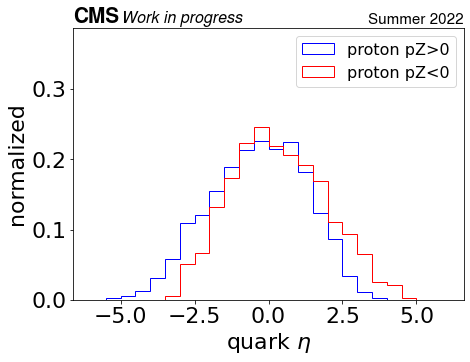

In [22]:
f, ax = plt.subplots(figsize=(7,5))
bins = np.linspace(start=-6,stop=6,num=25)
plt.hist(quark_eta[(proton_pz<6600) & (proton_pz>5700)], bins,density=True, histtype='step', label='proton pZ>0', color='b')
plt.hist(quark_eta[(proton_pz>-6600) & (proton_pz<-5700)], bins,density=True, histtype='step', label='proton pZ<0', color='r')
ax.legend(fontsize=16); 
ax.set_ylim([0, ax.get_ylim()[1]*1.5]) # set y axis to be a bit higher than maximal valus of the histogram to include the legend
hep.cms.label(llabel="Work in progress", rlabel="Summer 2022", ax=ax, fontsize=16)
ax.set(xlabel=r'quark $\eta$', ylabel='normalized')
plt.rcParams.update({'font.size': 20})
plt.savefig('quark_eta.png')

#### Invariant mass of two massless particles

It is helpful to consider the quarks and the leptons to be massless since $p >> m$. In that case, the invariant mass of two massless particles will be given by: $ m^2 = 2\cdot P_{T,1}P_{T,1}(\cosh(\Delta\eta) - cos(\Delta\phi))$

In [23]:
# quarks, leptons and protons and invariant mass of (lep+quark) are compiuted in the same event loop
quark_eta = np.zeros(n_events)
proton_pz = np.zeros(n_events)
lepton_eta = np.zeros(n_events)-999
mass_LepQuark = np.zeros(n_events)-999
isLeptonic_Decay = np.zeros(n_events)
for i in range(n_events):
    quark_eta[i] = filter_signal_events[i]['Particle.Eta'][3] 
    proton_pz[i] = filter_signal_events[i]['Particle.Pz'][0]
    isLeptonic_Decay[i] = isLepton(filter_signal_events[i]['Particle.PID'][4])
    if (isLeptonic_Decay[i]): 
        lepton_eta[i] = filter_signal_events[i]['Particle.Eta'][4]
        dEta = filter_signal_events[i]['Particle.Eta'][4] - filter_signal_events[i]['Particle.Eta'][3]
        dPhi = filter_signal_events[i]['Particle.Phi'][4] - filter_signal_events[i]['Particle.Phi'][3]
        PT1PT2 = filter_signal_events[i]['Particle.PT'][4] * filter_signal_events[i]['Particle.PT'][3]
        mass_LepQuark[i] = np.sqrt(2*PT1PT2*(np.cosh(dEta)-np.cos(dPhi)))

plot invariant mass distribution

In [24]:
f, ax = plt.subplots(figsize=(7,5))
bins = np.linspace(start=0,stop=400,num=50)
plt.hist(mass_LepQuark, bins,density=True, histtype='step', label='all events', color='b')
ax.legend(fontsize=16); 
ax.set_ylim([0, ax.get_ylim()[1]*1.5]) # set y axis to be a bit higher than maximal valus of the histogram to include the legend
hep.cms.label(llabel="Work in progress", rlabel="Summer 2022", ax=ax, fontsize=16)
ax.set(xlabel=r'$m_{q \ell}$ [GeV]', ylabel='normalized')
plt.rcParams.update({'font.size': 20})
plt.savefig('mass_LepQuark.png')

## Timing detectors